<a href="https://colab.research.google.com/github/shwetamakwana/cs-assignments/blob/master/JIETML_cs_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 # Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
downloaded = drive.CreateFile({'id':'1qpPwOdKChwMCDbL8j6JO2KzHCWcWftRF'})
downloaded.GetContentFile('SMSSpamCollection') 


**1. Loading the Data**

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**2. Exploratory Data Analysis**

In [ ]:
df.shape


(5572, 2)

In [ ]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

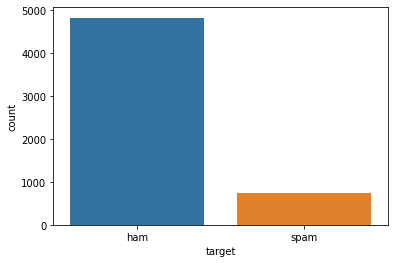

In [ ]:
sns.countplot(x='target',data=df)

In [84]:
def plot_sub_sentiment(spamcollection):
  new_df=df.loc[df['target']==spamcollection,:]  
  plt.figure(1)

In [85]:
from wordcloud import WordCloud ,STOPWORDS

In [89]:
new_df = df.loc[df['target']=='spam',:]
new_df.head()

,target,message,sentiment,clean_tweet_lema,tweet_len_lema
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry in a wkly comp to win fa cup final ...,30
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,freemsg hey there darling it s been week s now...,33
8,spam,WINNER!! As a valued network customer you have...,0,winner a a valued network customer you have be...,23
9,spam,Had your mobile 11 months or more? U R entitle...,0,had your mobile month or more u r entitled to ...,27
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0,six chance to win cash from to pound txt csh a...,22


In [ ]:
new_df['target'].value_counts()

spam    747
Name: target, dtype: int64

In [ ]:
words = ' '.join(df['message'])
print(words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

In [88]:
new_df=df.loc[df['target']=='spam',:]
words=' '.join(df['message'])
cleaned_word =' '.join([word for word in words.split()
 if '#&gt' not in word
 and not word.startswith('Hmmm')
 and word != 'RT' ])

In [90]:
wordcloud = WordCloud(stopwords = STOPWORDS,
background_color="yellow",
width = 1500,
height= 500,mode='RGB'
).generate(cleaned_word)


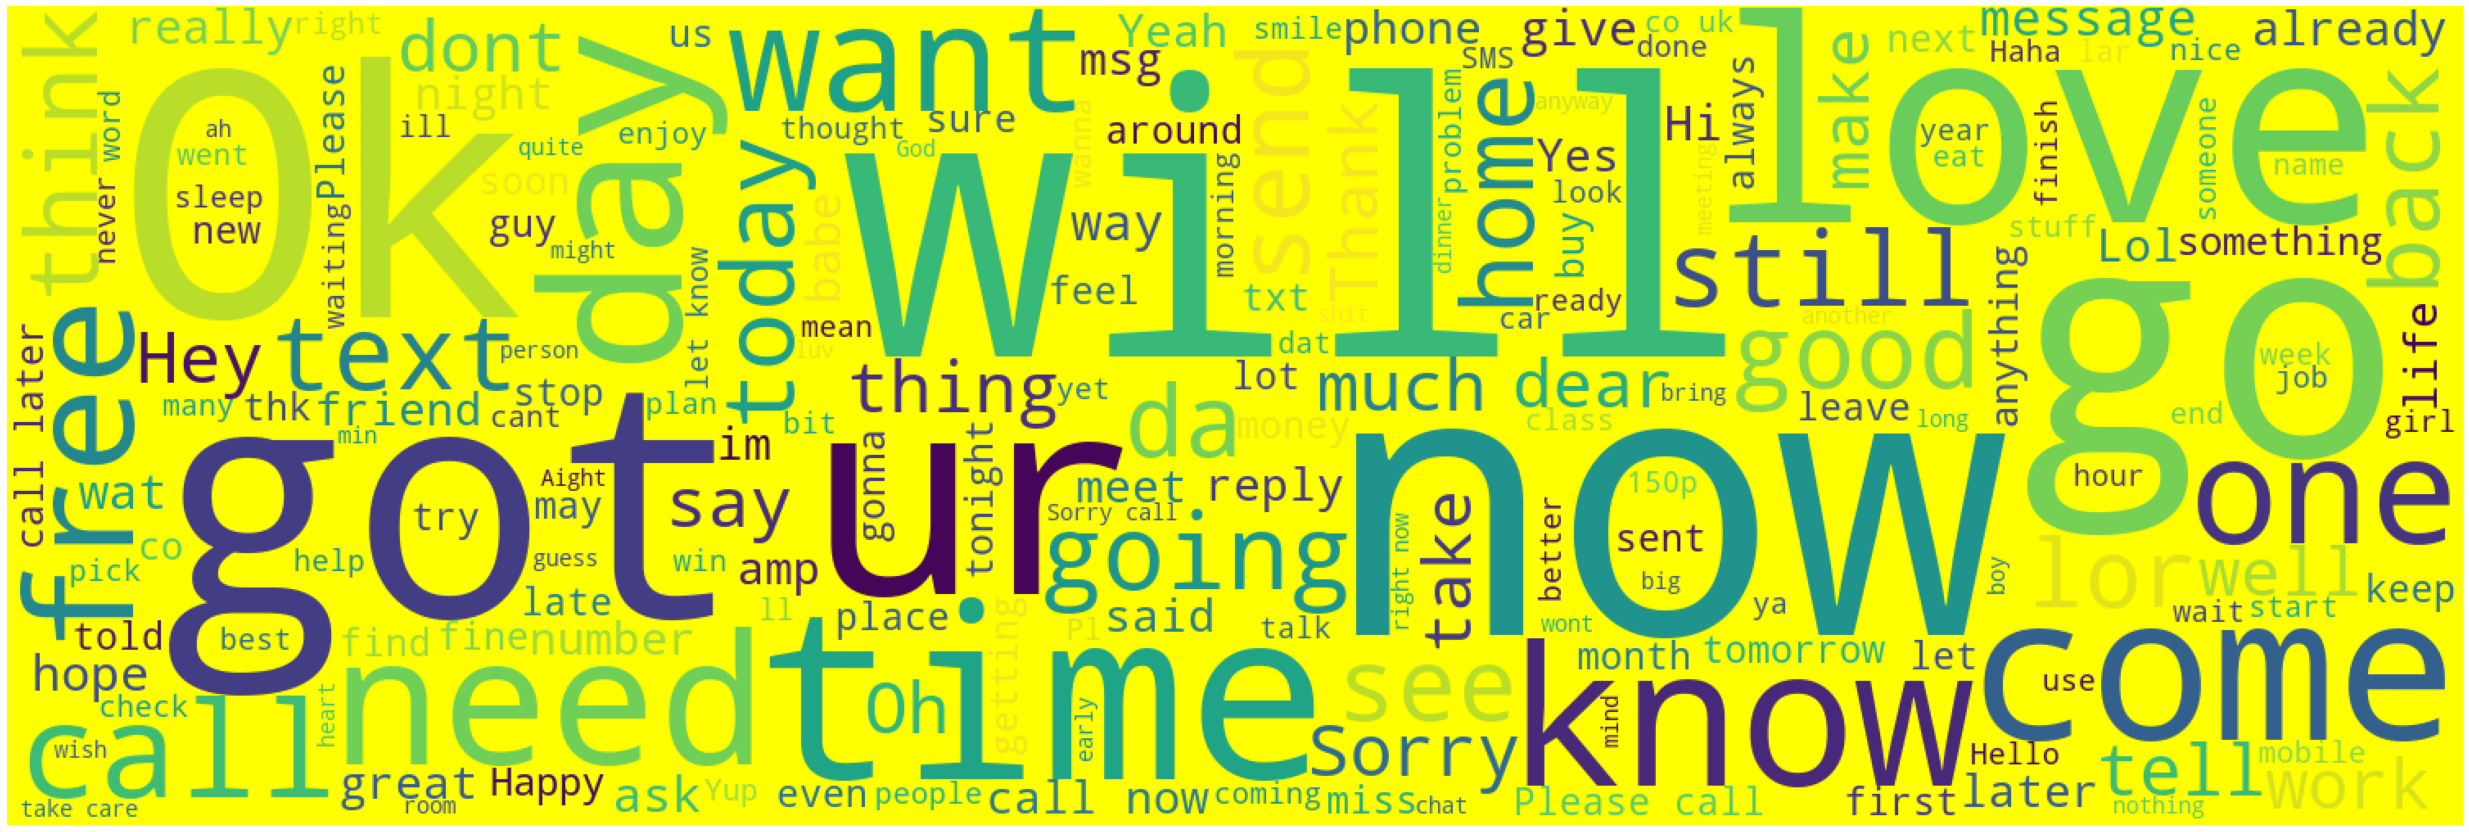

In [91]:
plt.figure(1,figsize=(44,33))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**3. Data Preparation**

In [11]:
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
stemmer= PorterStemmer()

In [14]:
lemmatizer = WordNetLemmatizer()

In [12]:
clean_tweet_lst=[]
tweet_len_lst =[]

In [17]:
def preprocess(raw_df,flag):
#removing special characters
 letters_only = re.sub( "[^a-zA-Z]",' ',raw_df)

#change sentence to Lower case
 letters_only = letters_only.lower()

#tokenize into words
 words = letters_only.split()

#stemming/temmatization
 words = [lemmatizer.lemmatize(word) for word in words ]
 clean_tweet_lst.append(' '.join(words))
 tweet_len_lst.append(len(words))

In [18]:
df['sentiment']=df['target'].apply(lambda x: 0 if x=='spam' else 1)

In [19]:
%%time
clean_tweet_lst=[]
tweet_len_lst = []
df['message'].apply(lambda x: preprocess(x,'lemma'))
df['clean_tweet_lema'] = clean_tweet_lst
df['tweet_len_lema'] = tweet_len_lst

CPU times: user 1.92 s, sys: 104 ms, total: 2.02 s
Wall time: 2.03 s


In [66]:
df.head()

,target,message,sentiment,clean_tweet_lema,tweet_len_lema
0,ham,"Go until jurong point, crazy.. Available only ...",1,go until jurong point crazy available only in ...,20
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry in a wkly comp to win fa cup final ...,30
3,ham,U dun say so early hor... U c already then say...,1,u dun say so early hor u c already then say,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah i don t think he go to usf he life around ...,14


**4. data Preparation**

In [20]:
#train test split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2)

In [21]:
train_clean_tweet=[]
for tweet in train['clean_tweet_lema']:
  train_clean_tweet.append(tweet)

  test_clean_tweet=[]
for tweet in test['clean_tweet_lema']:
  test_clean_tweet.append(tweet)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word')
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [23]:
vectorizer.vocabulary_

{'is': 2771,
 'ur': 5922,
 'lecture': 3061,
 'over': 3916,
 'honey': 2519,
 'sweetheart': 5417,
 'darling': 1303,
 'sexy': 4859,
 'bun': 747,
 'sugar': 5351,
 'plum': 4133,
 'loverboy': 3212,
 'miss': 3447,
 'you': 6394,
 'boytoy': 670,
 'smack': 5040,
 'your': 6397,
 'as': 318,
 'did': 1423,
 'go': 2219,
 'to': 5678,
 'the': 5562,
 'gym': 2336,
 'too': 5710,
 'this': 5599,
 'nd': 3629,
 'attempt': 356,
 'contract': 1136,
 'have': 2405,
 'won': 6262,
 'week': 6135,
 'top': 5717,
 'prize': 4279,
 'of': 3795,
 'either': 1650,
 'cash': 847,
 'or': 3875,
 'just': 2890,
 'call': 786,
 'loan': 3151,
 'for': 2010,
 'any': 227,
 'purpose': 4344,
 'even': 1747,
 'if': 2631,
 'bad': 418,
 'credit': 1209,
 'tenant': 5516,
 'welcome': 6145,
 'noworriesloans': 3751,
 'com': 1055,
 'on': 3837,
 'thank': 5553,
 'princess': 4268,
 'are': 283,
 'so': 5082,
 'hi': 2465,
 'test': 5533,
 'lt': 3226,
 'gt': 2313,
 'rd': 4429,
 'camera': 801,
 'quite': 4376,
 'good': 2237,
 'mega': 3377,
 'pixel': 4102,
 'o

In [75]:
print('Total unique words:',len(vectorizer.vocabulary_))
print('Type of train_features:',type(train_features))
print('Shape of input data', train_features.shape)

Total unique words: 6445
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6445)


**5. Train the Model & Evaluation**




**Logistic Regression & Decision Tree**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
Classifiers =[LogisticRegression(),
              DecisionTreeClassifier(),
RandomForestClassifier(n_estimators=100)
]

In [44]:
%%time
dense_features = train_features.toarray()
dense_test = test_features.toarray()
for classifier in Classifiers:
  fit = classifier.fit(dense_features,train['sentiment'])
  pred = fit.predict(dense_test)
  accuracy = accuracy_score(pred,test['sentiment'])
  print('Accuracy of '+classifier.__class__.__name__+ ' is ' +str(accuracy)) 

Accuracy of LogisticRegression is 0.9829596412556054
Accuracy of DecisionTreeClassifier is 0.9775784753363229
Accuracy of RandomForestClassifier is 0.9847533632286996
CPU times: user 40.1 s, sys: 423 ms, total: 40.5 s
Wall time: 38.7 s


In [54]:
from sklearn import metrics
metric = metrics.confusion_matrix(pred,test['sentiment'])
metric

array([[133,   0],
       [ 17, 965]])

In [55]:
print(metrics.classification_report(pred,test['sentiment']))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       133
           1       1.00      0.98      0.99       982

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115



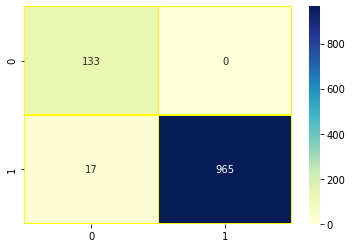

In [56]:
#Heatmap 
sns.heatmap(metric,annot=True,fmt='g',linecolor='yellow',linewidth=.2,cmap="YlGnBu")
plt.show()

**svm**

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
classifier = SVC()

dense_features = train_features.toarray()
dense_test = test_features.toarray()
fit=classifier.fit(dense_features,train['sentiment'])
pred = fit.predict(dense_test)
accuracy  = accuracy_score(pred,test['sentiment'])
print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


Accuracy of SVC is 0.9838565022421525


In [53]:
from sklearn import metrics
metric = metrics.confusion_matrix(pred,test['sentiment'])
metric

array([[133,   0],
       [ 17, 965]])

In [40]:
print(metrics.classification_report(pred,test['sentiment']))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       134
           1       1.00      0.98      0.99       981

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.99      0.98      0.98      1115



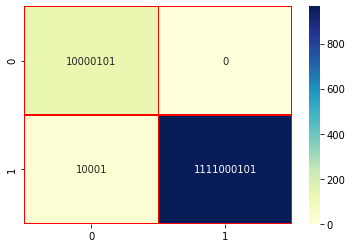

In [52]:
#Heatmap 
sns.heatmap(metric,annot=True,fmt='b',linecolor='red',linewidth=.2,cmap="YlGnBu")
plt.show()